SEMI-CONDUCTOR DATASET

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1. Explore the missingness in the dataset for categorical and numerical data

In [32]:
chipdata = pd.read_csv("chip_dataset.csv")

In [33]:
#Explore our data
chipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [34]:
#To check the missing values
missing_values = chipdata.isnull().sum()
missing_values

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

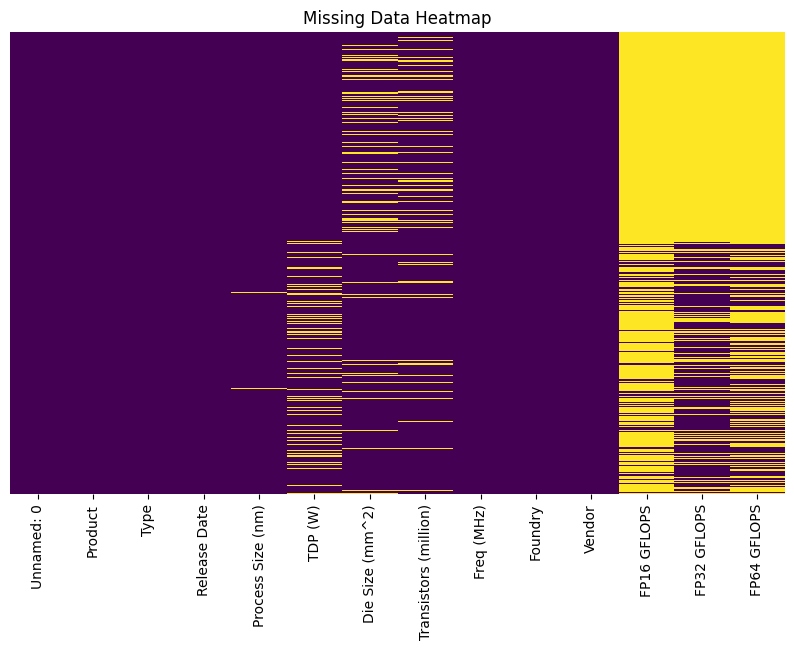

In [35]:
# Visualizing the missingness

plt.figure(figsize=(10, 6))
sns.heatmap(chipdata.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()



2. Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach

Dealing with missing values is a crucial step in data preprocessing to ensure the accuracy and reliability of your analysis or model. The strategy you choose depends on the nature of the data, the extent of missingness, and the potential impact on your analysis. Here's a strategy along with rationale for handling missing values:

1. **Understand the Nature of Missingness**:
   Start by understanding why data is missing. Is it missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR)? This understanding will help guide your strategy.

2. **Identify Columns with High Missing Values**:
   Identify columns that have a significant percentage of missing values. If a column has very few missing values, it might be reasonable to drop those rows. For columns with high missing values, you'll need to consider other strategies.

3. **Deletion of Rows or Columns**:
   If the percentage of missing values in a column is very high and the column doesn't seem crucial for your analysis, you might consider dropping the entire column. Dropping rows with missing values can also be an option, but it should be done carefully to avoid losing valuable information.

   **Rationale**: Deletion is appropriate when missing values are sparse and not expected to significantly affect the analysis. However, if a column with high missing values contains important information, deletion could lead to loss of critical insights.

4. **Imputation**:
   Imputation involves filling in missing values with estimated or inferred values. Different strategies can be used based on the type of data:

   - **Mean/Median Imputation**: For numerical data, you can replace missing values with the mean or median of the column.
   
   - **Mode Imputation**: For categorical data, you can replace missing values with the mode (most frequent value) of the column.
   
   - **Interpolation**: If the data has a time series nature, you can use interpolation methods to estimate missing values based on neighboring data points.

   - **Advanced Imputation Techniques**: For more sophisticated approaches, you can use algorithms like k-nearest neighbors imputation, regression imputation, or predictive modeling to estimate missing values based on other variables.

   **Rationale**: Imputation is suitable when missing values are relatively small in number and dropping the corresponding rows or columns would result in a significant loss of data. It helps retain the overall structure of the dataset.

5. **Create Indicator Variables**:
   Instead of directly imputing missing values, you can create binary indicator variables to signify whether a value was missing in a particular column. This way, you're not introducing assumptions about the imputed values.

   **Rationale**: Indicator variables can provide information about the missingness pattern, which could be valuable in understanding potential biases in your data.

In [36]:
chipdata["Product"].value_counts()

Product
AMD Athlon 64 3200+         12
AMD Sempron 3000+           10
AMD Athlon 64 3000+         10
Intel HD Graphics           10
AMD Athlon 64 3500+          9
                            ..
AMD Opteron 6276             1
AMD Opteron 6278             1
Intel Xeon E5-1620 v2        1
AMD Phenom X4 9750 (95W)     1
NVIDIA GeForce 9300 SE       1
Name: count, Length: 4278, dtype: int64

In [37]:
chipdata["Type"].value_counts()

Type
GPU    2662
CPU    2192
Name: count, dtype: int64

In [38]:
chipdata["Foundry"].value_counts()

Foundry
TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

In [39]:
chipdata["Vendor"].value_counts()

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [40]:
chipdata["TDP (W)"].value_counts()

TDP (W)
65.0     341
35.0     315
15.0     229
95.0     181
45.0     156
        ... 
102.0      1
286.0      1
380.0      1
345.0      1
900.0      1
Name: count, Length: 200, dtype: int64

________
3. Drop non-consequntial fields

In [41]:
# List of non-consequential field names to drop
# In my view, the last 3 columns which have a lot of missing values are not needed much hence I shall drop them. 

non_consequential_fields = ["FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"]

# Drop the non-consequential fields from the DataFrame
chipdata = chipdata.drop(columns=non_consequential_fields)

chipdata.head ()


,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD


____
4. Transform temporal data to their corrrect format (date time)

In [42]:
chipdata['Release Date'] = pd.to_datetime(chipdata['Release Date'])
chipdata.dtypes

Unnamed: 0                        int64
Product                          object
Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                         float64
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (MHz)                      float64
Foundry                          object
Vendor                           object
dtype: object

___
4. Perform a full EDA and demonstrate the validity of the following assumption: that Moore's Law still holds, especially in GPUs.

Moore's Law states that the number of transistors on a microchip doubles approximately every two years. To validate this assumption, observe if the "Transistors" attribute follows an upward trend over the years. If the number of transistors tends to double roughly every two years, it would support the validity of Moore's Law.

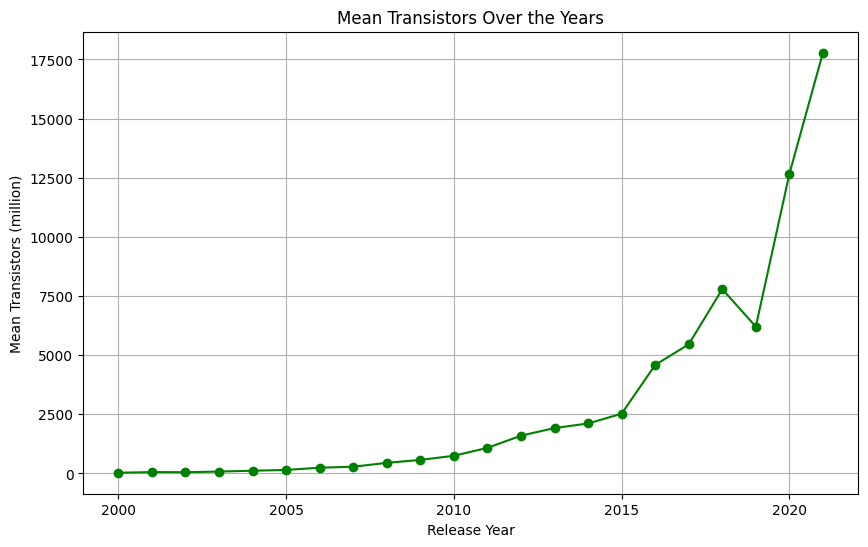

In [43]:

# Group data by year and calculate mean Transistors
yearly_transistors = chipdata.groupby(chipdata["Release Date"].dt.year)["Transistors (million)"].mean()

# Create a line plot of mean Transistors over the years
plt.figure(figsize=(10, 6))
yearly_transistors.plot(color= 'green', marker="o")
plt.title("Mean Transistors Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Mean Transistors (million)")
plt.grid()
plt.show()

#As we are seeing an upward curve, except in some instances where there are a few anomalies, the information looks consistent and we 
#...can state that Moore's law does hold true. 

____
4b. Assessing if Dennard Scaling is still valid in general

Dennard Scaling, similar to Moore's Law, refers to the historical trend in semiconductor manufacturing where the power density of transistors remains roughly constant as their size decreases.

**Power density** refers to the amount of power dissipated by a computer chip per unit of chip area

As our data does not have power density, we have to calculate this. Power density = TDP/ Die Size (Power/ die size)
-> TDP stands for "Thermal Design Power" in chip data. It is used to indicate the amount of heat generated by a computer chip

In [44]:
#Creating a column on power density

chipdata['Power Density'] = (chipdata['TDP (W)'] / chipdata['Die Size (mm^2)'])
chipdata.head (5)


,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,Power Density
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,0.584416
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,0.182292
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,0.500000
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,0.484496


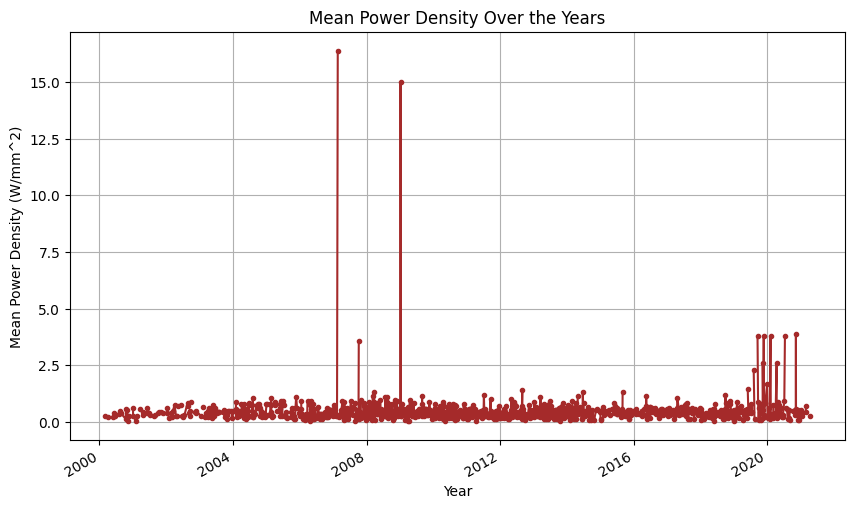

In [45]:
# Group data by year and calculate mean Power Density
yearly_power_density = chipdata.groupby("Release Date")["Power Density"].mean()

# Create a line plot of mean Power Density over the years
plt.figure(figsize=(10, 6))
yearly_power_density.plot(color= 'brown', marker=".")
plt.title("Mean Power Density Over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Power Density (W/mm^2)")
plt.grid()
plt.show()

# The power density in most instances remains relatively stable despite smaller process sizes
# ....this could support the assumption that Dennard Scaling is still valid
# ...However, ther are some outliers in the data which need to be investigated to hold validity with no doubt. 


_____
4c. CPUs have higher frequencies, but GPUs are catching up

-----
4d. GPU performance doubles every 1.5 years